### 工作進度  
* 【置頂】**筆記內容架構**與**量化技術分析系統**相關資訊請參閱[260110筆記.ipynb](https://github.com/yilintung/StockInvestmentNotebook/blob/main/260110%E7%AD%86%E8%A8%98.ipynb)之「工作進度」。  

* 引入模組與定義公用函式  

In [1]:
import numpy as np
import mysys
import markdown
from IPython.core.display import HTML

In [2]:
def stock_analysis( analysis, stock_id, buttom_pattern = False) :
    results,images = analysis.analysis(stock_id)
    if buttom_pattern is True and '底部型態' in images :
        print('底型反轉交易策略：')
        display(images['底部型態'])
    print('解盤內容：')
    if '整體評價' in images :
        display(images['整體評價'])
    result_md   = results.to_markdown(tablefmt="grid")
    result_html = markdown.markdown(result_md, extensions=['markdown_grid_tables:GridTableExtension'])
    display(HTML(result_html))

* 更新量化技術分析資料庫  

In [3]:
mysys.UpdateStockDatabase()

2026-02-09 20:24:57.403 | INFO     | FinMind.data.finmind_api:get_data:171 - download TaiwanStockInfo, data_id: 


##### 更新台股總覽 #####
修改股票資訊。代碼 ＝ 1471：股票名稱 ＝ 首利，產業類別 ＝ 電子工業，類型 ＝ twse
修改股票資訊。代碼 ＝ 1598：股票名稱 ＝ 岱宇，產業類別 ＝ 化學生技醫療，類型 ＝ twse
修改股票資訊。代碼 ＝ 1710：股票名稱 ＝ 東聯，產業類別 ＝ 化學工業，類型 ＝ twse
修改股票資訊。代碼 ＝ 1711：股票名稱 ＝ 永光，產業類別 ＝ 化學工業，類型 ＝ twse
修改股票資訊。代碼 ＝ 1720：股票名稱 ＝ 生達，產業類別 ＝ 生技醫療業，類型 ＝ twse
修改股票資訊。代碼 ＝ 1722：股票名稱 ＝ 台肥，產業類別 ＝ 化學生技醫療，類型 ＝ twse
修改股票資訊。代碼 ＝ 1731：股票名稱 ＝ 美吾華，產業類別 ＝ 化學生技醫療，類型 ＝ twse
修改股票資訊。代碼 ＝ 1736：股票名稱 ＝ 喬山，產業類別 ＝ 化學生技醫療，類型 ＝ twse
修改股票資訊。代碼 ＝ 1752：股票名稱 ＝ 南光，產業類別 ＝ 生技醫療業，類型 ＝ twse
修改股票資訊。代碼 ＝ 1760：股票名稱 ＝ 寶齡富錦，產業類別 ＝ 生技醫療業，類型 ＝ twse
修改股票資訊。代碼 ＝ 1762：股票名稱 ＝ 中化生，產業類別 ＝ 生技醫療業，類型 ＝ twse
修改股票資訊。代碼 ＝ 1783：股票名稱 ＝ 和康生，產業類別 ＝ 化學生技醫療，類型 ＝ twse
修改股票資訊。代碼 ＝ 2303：股票名稱 ＝ 聯電，產業類別 ＝ 半導體業，類型 ＝ twse
修改股票資訊。代碼 ＝ 2305：股票名稱 ＝ 全友，產業類別 ＝ 電子工業，類型 ＝ twse
修改股票資訊。代碼 ＝ 2315：股票名稱 ＝ 神達，產業類別 ＝ 電子工業，類型 ＝ twse
修改股票資訊。代碼 ＝ 2321：股票名稱 ＝ 東訊，產業類別 ＝ 通信網路業，類型 ＝ twse
修改股票資訊。代碼 ＝ 2331：股票名稱 ＝ 精英，產業類別 ＝ 電子工業，類型 ＝ twse
修改股票資訊。代碼 ＝ 2336：股票名稱 ＝ 致伸，產業類別 ＝ 電腦及週邊設備業，類型 ＝ twse
修改股票資訊。代碼 ＝ 2347：股票名稱 ＝ 聯強，產業類別 ＝ 電子通路業，類型 ＝ twse
修改股票資訊。代碼 ＝ 2350：股票名稱 ＝ 環

2026-02-09 20:24:58.016 | INFO     | FinMind.data.finmind_api:get_data:171 - download TaiwanStockPrice, data_id: 


【略過】日Ｋ：2026-01-30


2026-02-09 20:25:03.761 | INFO     | FinMind.data.finmind_api:get_data:171 - download TaiwanStockPrice, data_id: 
2026-02-09 20:25:07.336 | INFO     | FinMind.data.finmind_api:get_data:171 - download TaiwanStockPrice, data_id: 
2026-02-09 20:25:10.918 | INFO     | FinMind.data.finmind_api:get_data:171 - download TaiwanStockPrice, data_id: 


【略過】日Ｋ：2026-02-02
【略過】週Ｋ：2026-02-02


2026-02-09 20:25:17.413 | INFO     | FinMind.data.finmind_api:get_data:171 - download TaiwanStockPrice, data_id: 


【略過】日Ｋ：2026-02-03


2026-02-09 20:25:22.850 | INFO     | FinMind.data.finmind_api:get_data:171 - download TaiwanStockPrice, data_id: 


【略過】日Ｋ：2026-02-04


2026-02-09 20:25:28.151 | INFO     | FinMind.data.finmind_api:get_data:171 - download TaiwanStockPrice, data_id: 


【略過】日Ｋ：2026-02-05


2026-02-09 20:25:33.534 | INFO     | FinMind.data.finmind_api:get_data:171 - download TaiwanStockPrice, data_id: 


【略過】日Ｋ：2026-02-06


2026-02-09 20:25:38.902 | INFO     | FinMind.data.finmind_api:get_data:171 - download TaiwanStockPrice, data_id: 
2026-02-09 20:25:42.479 | INFO     | FinMind.data.finmind_api:get_data:171 - download TaiwanStockPrice, data_id: 
2026-02-09 20:25:46.091 | INFO     | FinMind.data.finmind_api:get_data:171 - download TaiwanStockPrice, data_id: 


【新建】日Ｋ：2026-02-09


* 建立「解盤」物件    

In [4]:
analysis = mysys.StockAnalysis()

### 大盤解盤  

* 加權指數  

> **開盤**：加權指數開高，還在短線盤整區間。  
> 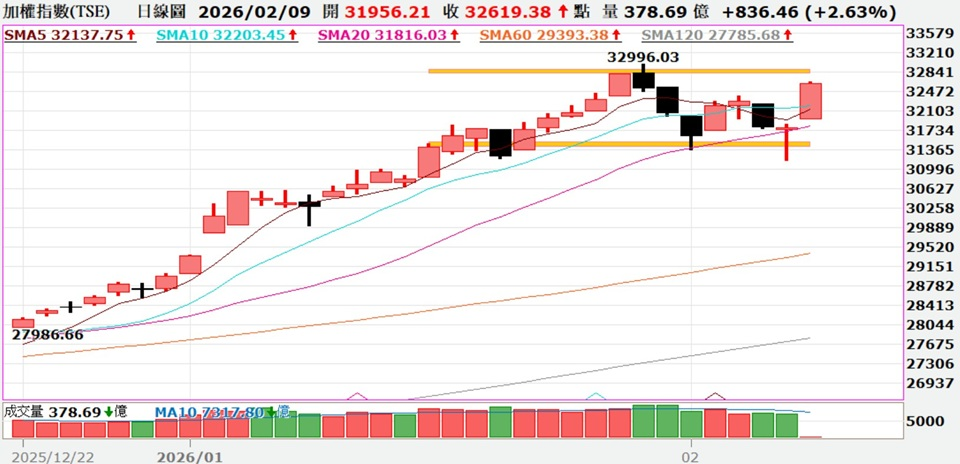  

In [5]:
# 壓力線與支撐線
def line_drawing_callback( range_prices) :

    # 壓力線
    resistance_line_start_date = '2026-01-16'
    resistance_line_end_date   = range_prices.iloc[-1].name.strftime("%Y-%m-%d")
    resistance_line_price      = range_prices.loc['2026-01-29']['Open']
    
    # 支撐線
    support_line_start_date = '2026-01-16'
    support_line_end_date   = range_prices.iloc[-1].name.strftime("%Y-%m-%d")
    support_line_price      = range_prices.loc['2026-01-16']['High']
    
    seq_of_seq_of_points=[
        [(resistance_line_start_date,resistance_line_price),(resistance_line_end_date,resistance_line_price)],
        [(support_line_start_date,support_line_price),(support_line_end_date,support_line_price)]
    ]

    linewidths=[2.5,2.5]
    
    colors=['xkcd:orange yellow','xkcd:orange yellow']

    return seq_of_seq_of_points,linewidths,colors

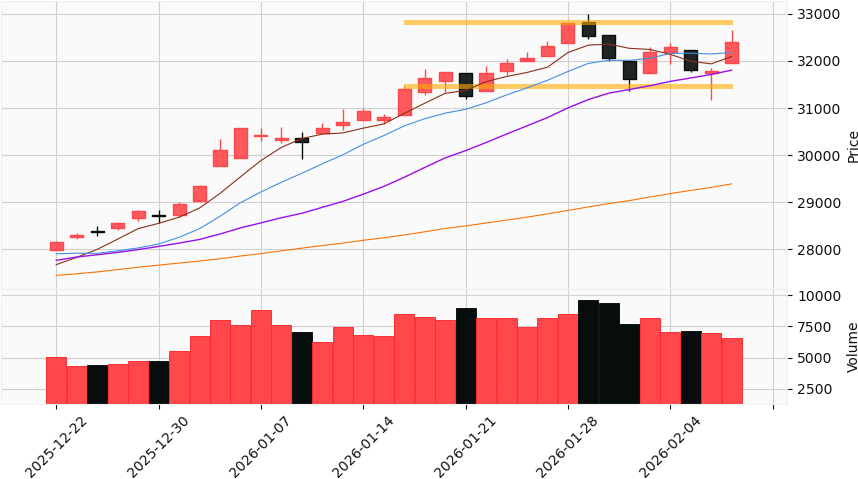

In [6]:
# 收盤：壓力線與支撐線
image = mysys.DrawOnKlineChart('TAIEX','2025-12-22','2026-02-09',line_drawing_callback)
display(image)

> **盤後**：量化技術分析  

解盤內容：


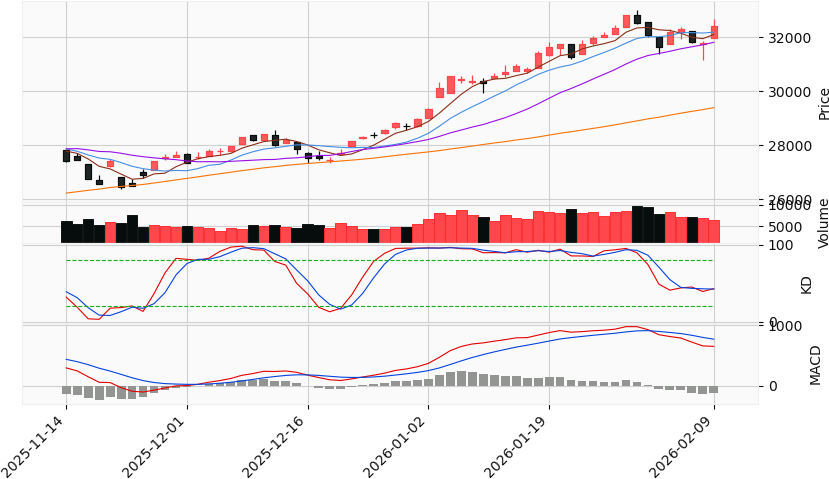

技術分析工具,解盤內容
Ｋ線／Ｋ棒,紡錘線 : 2026-02-06 十字線 : 2026-02-06 高檔夜星 : 2026-02-05
Ｋ線圖,中期為高位階 長期為高位階
成交量,價量關係：成交量小於十日均量（成交量 ＝ 6539.58億元 ，十日均量 ＝ 7939.58億元）
型態,反轉型態之上升楔形，型態範圍由2025-04-09開始到2026-02-06結束。
移動平均線,5日線上揚、10日線上揚，短期翻多；20日線上揚、60日線上揚，中期翻多；120日線上揚、240日線上揚，長期翻多
ＫＤ指標,於2026-02-09黃金交叉。
ＭＡＣＤ指標,MACD雙線在零軸以上，中期多方
週Ｋ－週ＫＤ指標,於2026-01-19當週死亡交叉。並且2026-02-02該週在超買區。
整體評價,"價格趨勢 整體仍屬上漲趨勢，價格維持在中期均線之上，結構未被破壞。短線在前一波回檔後出現反彈，收盤重新站回短期均線上方，偏向續強整理。 價量關係 反彈當日收紅但成交量較前幾日縮減，屬於價漲量縮，追價動能偏保守。若後續要延續上攻，需觀察量能是否回升配合，否則較易轉為高檔震盪。 支撐與壓力 支撐先看約 32,100點（短期均線附近），再看約 31,800點（近幾日回檔收盤區與短線防守帶）。壓力先看約 32,700點（近期高點），突破後上方壓力尚未形成明確密集區。 KD 指標解讀 KD 位於中性區，K 值回升並與 D 值貼近，顯示短線回檔後的修復力道仍在。尚未進入超買區，偏向「反彈延續但力道不強」的型態。 MACD 指標解讀 DIF 仍在 MACD 線下方，且兩線整體走勢偏下，代表中短期動能仍在降溫。柱狀體雖仍為負值但負值縮小，顯示下行動能有收斂，短線反彈較偏修正性質。 綜合評價 中期多頭架構仍在，但短線屬高檔震盪偏強，上攻需要量能與動能同步轉強才有利續創高。操作上以 32,100點/31,800點作為多方防守觀察，未能放量突破 32,700點前，較適合區間應對、嚴守停損。"


In [7]:
# 盤後：加權指數解盤
stock_analysis(analysis,'TAIEX')

* 櫃買指數  

> **開盤**：櫃買指數也是單日反彈，短線盤整。  
> 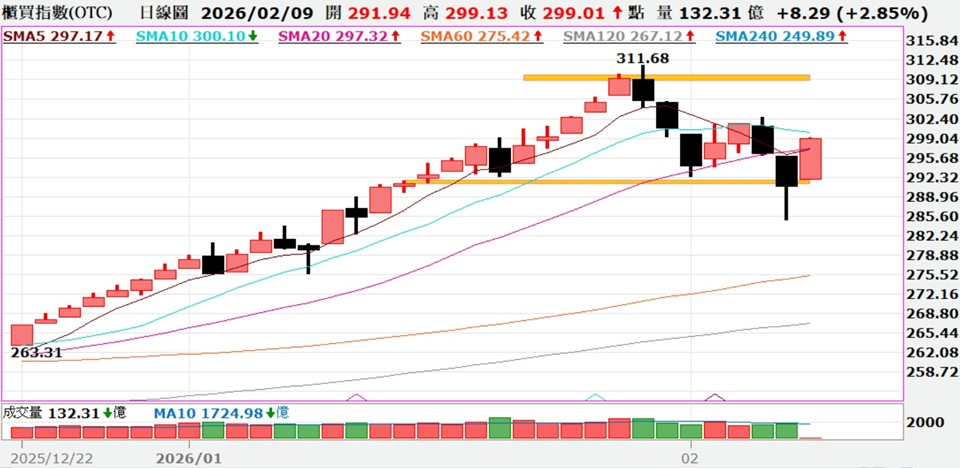  

In [8]:
# 壓力線與支撐線
def line_drawing_callback( range_prices) :

    # 壓力線
    resistance_line_start_date = '2026-01-22'
    resistance_line_end_date   = range_prices.iloc[-1].name.strftime("%Y-%m-%d")
    resistance_line_price      = range_prices.loc['2026-01-28']['Close']
    
    # 支撐線
    support_line_start_date = '2026-01-15'
    support_line_end_date   = range_prices.iloc[-1].name.strftime("%Y-%m-%d")
    support_line_price      = range_prices.loc['2026-01-15']['High']
    
    seq_of_seq_of_points=[
        [(resistance_line_start_date,resistance_line_price),(resistance_line_end_date,resistance_line_price)],
        [(support_line_start_date,support_line_price),(support_line_end_date,support_line_price)]
    ]

    linewidths=[2.5,2.5]
    
    colors=['xkcd:orange yellow','xkcd:orange yellow']

    return seq_of_seq_of_points,linewidths,colors

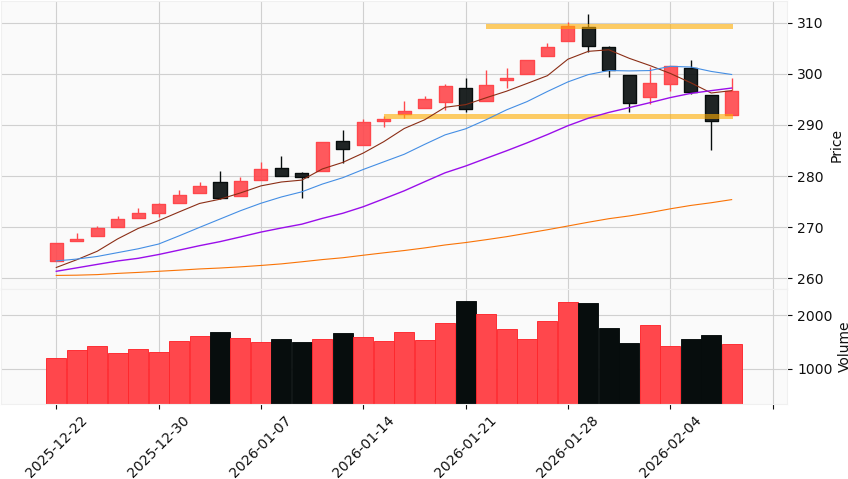

In [9]:
# 收盤：壓力線與支撐線
image = mysys.DrawOnKlineChart('TPEx','2025-12-22','2026-02-09',line_drawing_callback)
display(image)

> **盤後**：量化技術分析  

解盤內容：


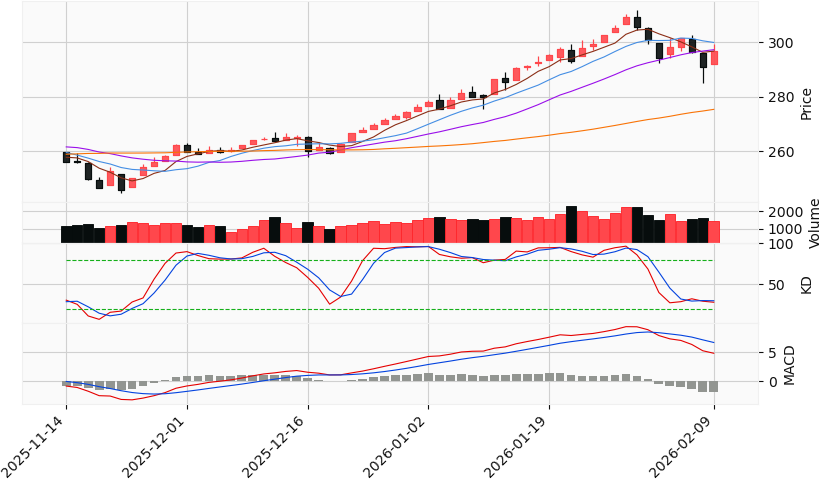

技術分析工具,解盤內容
Ｋ線／Ｋ棒,孕育線／懷抱線 : 2026-02-03
Ｋ線圖,中期為高位階 長期為高位階
成交量,價量關係：成交量小於十日均量（成交量 ＝ 1456.24億元 ，十日均量 ＝ 1748.31億元）
型態,反轉型態之頭肩底，型態範圍由2024-11-12開始到2025-12-23結束，估算目標價為346.86點。
移動平均線,5日線上揚、10日線下彎，短期盤整；20日線上揚、60日線上揚，中期翻多；120日線上揚、240日線上揚，長期翻多
ＫＤ指標,於2026-02-06死亡交叉。
ＭＡＣＤ指標,MACD雙線在零軸以上，中期多方
週Ｋ－週ＫＤ指標,於2026-01-12當週死亡交叉。
整體評價,價格趨勢 目前屬於上漲後回檔格局：前波沿均線走升，但近幾日自高檔拉回，短期波動加大。收盤回到約296點附近，呈現反彈但仍未重回前高區的強勢段。 價量關係 回檔段的成交量未見明顯失控放大，偏向量能中性、以換手消化賣壓為主。反彈日量能亦未顯著放大，顯示買盤追價力道仍偏保守。 支撐與壓力 - 支撐：先看296.2點～296.7點（短期均線與近期收盤密集區），跌破則看291.9點～290.7點（近兩日收盤區），再下方關鍵為285.0點（近期回檔低點）。 - 壓力：上方先看299.9點～301.5點（短期均線與近期高點區），突破後才有機會再挑戰302.6點（近期波段高點）。 KD 指標解讀 K、D落在20～30附近，屬於低檔區，短線偏向止跌整理、醞釀反彈的型態。惟目前仍未出現明確的強勢上彎擴散，反彈延續性仍需觀察。 MACD 指標解讀 DIF位於MACD線下方且兩者皆呈下行，代表中短期趨勢動能仍偏弱。OSC柱狀體維持負值且未明顯翻正，顯示下跌動能雖有趨緩跡象，但尚未轉為多方主導。 綜合評價 整體為多頭趨勢中的回檔修正：中期均線仍上行，但短期均線走平偏弱，反彈需先站回300點附近才有利於修復結構。操作上以守住296點與291點支撐作為風險控管重點，未突破301～303點壓力前，較適合區間應對而非追價。


In [10]:
# 盤後：櫃買指數解盤
stock_analysis(analysis,'TPEx')

### 個股篩選  

* 選股程序    

In [11]:
results = analysis.screener()

In [12]:
for stock_info in results :
    print('股票代碼 ＝ {} ， 股票名稱 ＝ {} '.format(stock_info[0],stock_info[1]))

股票代碼 ＝ 1466 ， 股票名稱 ＝ 聚隆 


* 篩選結果  
  - 安可(3615)：多頭回檔  
    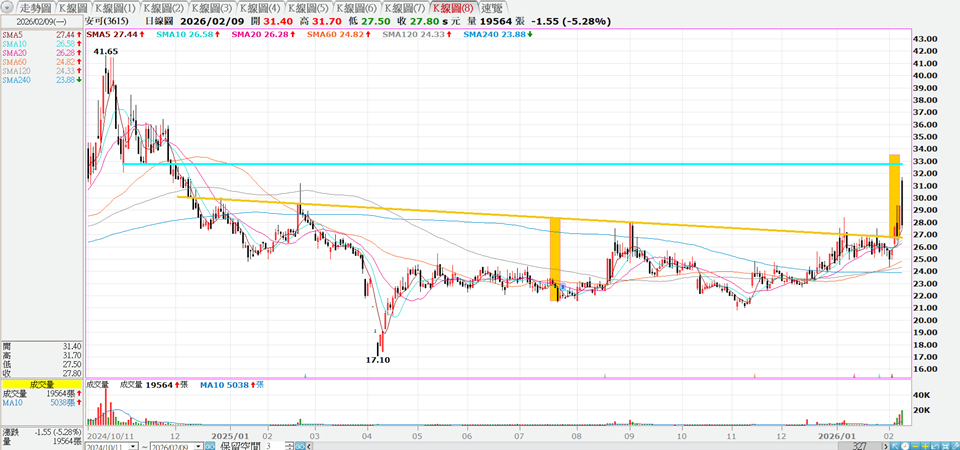  
  - 聯穎(3550)：穩健續漲／強勢多頭  
    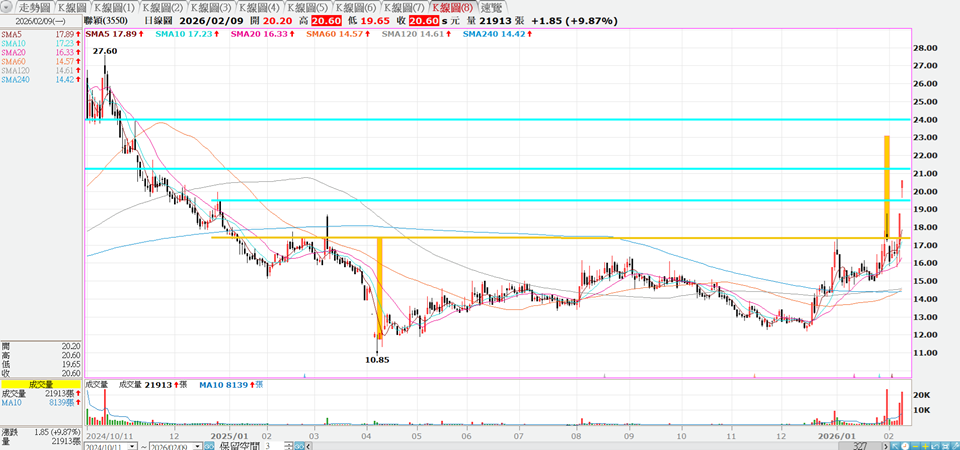  
  - 台橡(2103)：盤整觀察  
    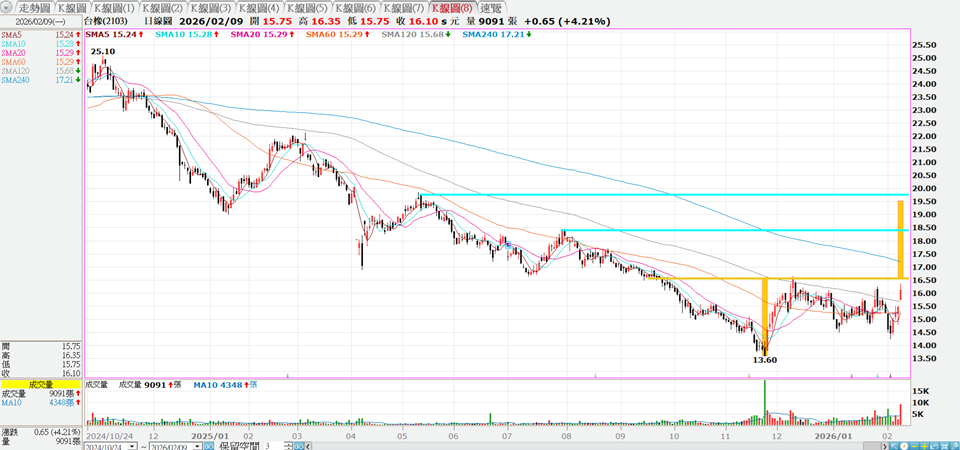  

* 觀察股列表  
  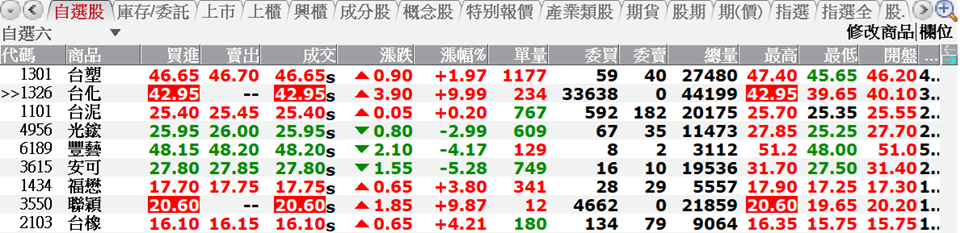  

### 個股解盤  

* 台化(1326)  
  看法：強勢反彈，突破狹幅盤整區間。  

> **盤後**：量化技術分析  

解盤內容：


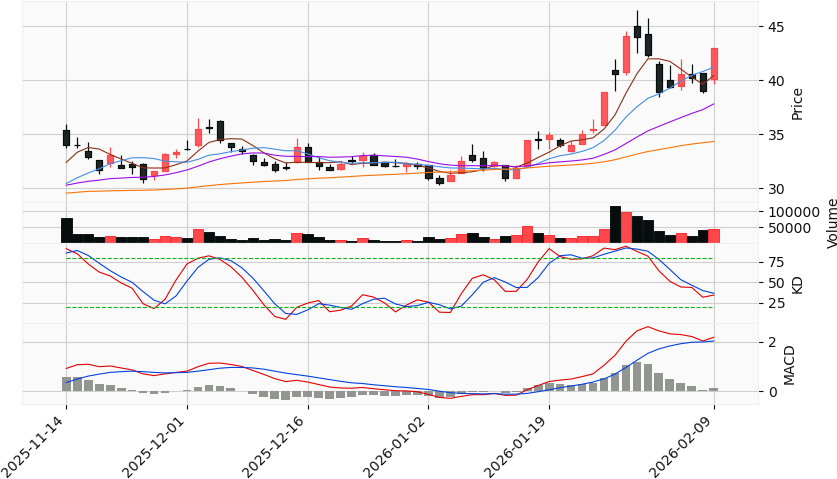

技術分析工具,解盤內容
Ｋ線／Ｋ棒,紡錘線 : 2026-02-05 孕育線／懷抱線 : 2026-02-03
Ｋ線圖,中期為高位階 長期為高位階
成交量,價量關係：成交量小於十日均量（成交量 ＝ 44434張 ，十日均量 ＝ 57366張）
型態,盤整型態之矩形，型態範圍由2025-08-22開始到2025-11-12結束。
移動平均線,5日線上揚、10日線上揚，短期翻多；20日線上揚、60日線上揚，中期翻多；120日線上揚、240日線上揚，長期翻多
ＫＤ指標,於2026-01-29死亡交叉。
ＭＡＣＤ指標,MACD雙線在零軸以上，中期多方
週Ｋ－週ＫＤ指標,於2026-02-02當週死亡交叉。
整體評價,價格趨勢 目前屬於上漲後的高檔震盪偏多：2/6一度回檔至 38.8 元後，2/9以長紅K強勢收在 42.95 元並創近波段高點。短期均線已被重新站回，但上方仍接近前高區，走勢偏向「拉回再攻」的型態。 價量關係 2/9上漲伴隨明顯放量，屬於價漲量增，買盤動能回溫且有推升意圖。惟前一交易日（2/6）下跌亦放量，代表高檔仍有換手與分歧，後續需觀察能否延續量能承接。 支撐與壓力 - 支撐：先看 40.4 元附近（短期均線帶），跌破則看 39.65～39.05 元區間（近五日低點/收盤密集區），再下方關鍵支撐為 38.8 元（2/6低點）。 - 壓力：上方先看 42.95 元（2/9高點/收盤），突破後的下一道壓力落在 45.0 元附近（前高區）。 KD 指標解讀 KD目前位於中低檔區，K值略低於D值且兩者仍偏向下彎，顯示短線動能尚未完全轉強。未進入超買區，若後續K線能上穿D線，才較有利於延續反彈。 MACD 指標解讀 DIF位於MACD線之上，多方結構仍在；但先前兩線走勢曾趨緩後，近期才出現回升跡象。灰色柱狀體由縮小轉為再度放大，代表上漲動能有回溫，但仍需連續擴大才能確認攻勢延續。 綜合評價 整體為偏多格局中的高檔震盪，2/9放量長紅有利於多方重新掌控節奏，但上方貼近壓力區，短線仍可能反覆。操作上以 40.4 元與 39.05～39.65 元作為多方防守觀察，能否有效突破並站穩 42.95 元，將決定是否挑戰 45 元壓力帶。


In [13]:
stock_analysis(analysis,'1326')

> **盤後**：底部反轉交易策略分析  

In [14]:
def line_drawing_callback( range_prices) :
    # 設定頸線
    neckline_start_date = '2024-11-11'
    neckline_end_date   = range_prices.iloc[-1].name.strftime("%Y-%m-%d")
    neckline_price      = range_prices.loc['2025-12-04']['Open']

    # 設定底部日期與價格
    bottom_date  = '2025-06-23'
    bottom_price = range_prices.loc['2025-06-23']['Close']

    # 估算目標價
    target_price = (neckline_price - bottom_price) + neckline_price

    print('估算目標價為{:.2f}元'.format(target_price))

    # 設定突破日期
    breakout_date = '2026-01-26'
    
    seq_of_seq_of_points=[
        [(neckline_start_date,neckline_price),(neckline_end_date,neckline_price)],
        [(bottom_date,bottom_price),(bottom_date,neckline_price)],
        [(breakout_date,neckline_price),(breakout_date,target_price)]
    ]

    linewidths=[2.0,15.0,15.0]
    
    colors=['xkcd:orange yellow','xkcd:orange yellow','xkcd:orange yellow']
    
    return seq_of_seq_of_points,linewidths,colors

估算目標價為50.10元


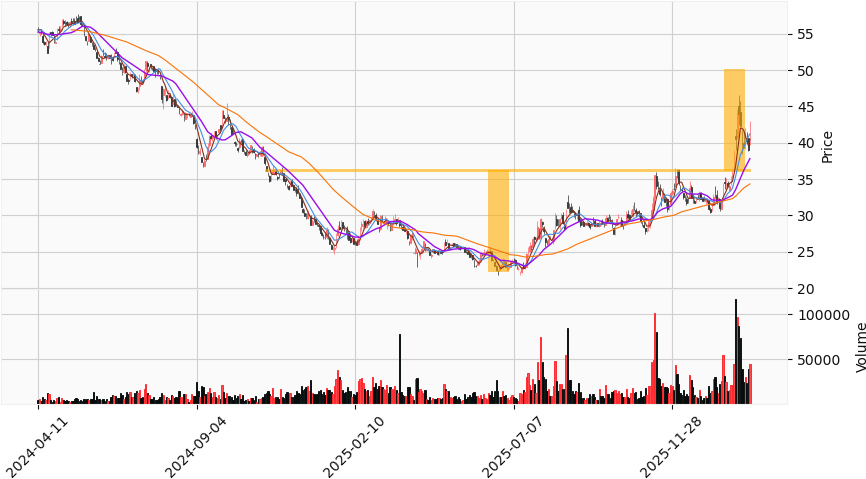

In [15]:
image = mysys.DrawOnKlineChart('1326','2024-04-11','2026-02-09',line_drawing_callback)
display(image)

籌碼面：  
法人大買(+9202)：外資大買(+6806)、投信小買(+438)、自營大買(+1958)。  
主力大買(+14795)。  
分公司買賣家數差集中(+56)。  
融資大減(-800)、融券大增(+452)。  